In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
apps_df = pd.read_csv('../data/googleplaystore.csv')
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
reviews_df = pd.read_csv('../data/googleplaystore_user_reviews.csv')
reviews_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [16]:
apps_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [17]:
apps_df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
apps_df.drop(10472, axis=0, inplace=True, errors='ignore')


In [19]:
apps_df['Reviews'] = apps_df['Reviews'].astype(int)


In [20]:
apps_df['Installs'] = (
    apps_df['Installs']
    .astype(str)
    .str.replace(',', '')
    .str.replace('+', '')
    .astype(int)
)


In [21]:
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '')
apps_df['Price'] = apps_df['Price'].astype(float)


In [22]:
import numpy as np

def size_to_mb(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k','')) / 1024
    else:
        return np.nan

apps_df['Size_MB'] = apps_df['Size'].apply(size_to_mb)


In [23]:
apps_df[['Size','Size_MB']].head()


,Size,Size_MB
0,19M,19.0
1,14M,14.0
2,8.7M,8.7
3,25M,25.0
4,2.8M,2.8


In [24]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['No installs','Very Low','Low','Moderate','More than Moderate','High','Very High','Top Notch']

apps_df['Installs_category'] = pd.cut(apps_df['Installs'], bins=bins, labels=labels)
apps_df['Installs_category'].value_counts()


Installs_category
Low                   2161
High                  2118
Very High             2004
More than Moderate    1648
Moderate              1531
Top Notch              828
Very Low               535
No installs             15
Name: count, dtype: int64

In [25]:
apps_df['Rating'] = apps_df['Rating'].fillna(
    apps_df.groupby('Installs_category')['Rating'].transform('mean')
)


<ipython-input-25-3b66e467d2ca>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apps_df.groupby('Installs_category')['Rating'].transform('mean')


In [26]:
apps_df.drop_duplicates(inplace=True)


In [27]:
apps_df.duplicated().sum()


np.int64(0)

In [28]:
num_df = apps_df[['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']]
num_df.head()


,Rating,Reviews,Installs,Price,Size_MB
0,4.1,159,10000,0.0,19.0
1,3.9,967,500000,0.0,14.0
2,4.7,87510,5000000,0.0,8.7
3,4.5,215644,50000000,0.0,25.0
4,4.3,967,100000,0.0,2.8


In [29]:
corr = num_df.corr()
corr


,Rating,Reviews,Installs,Price,Size_MB
Rating,1.000000,0.062255,0.043854,-0.020445,0.062389
Reviews,0.062255,1.000000,0.634997,-0.009417,0.237891
Installs,0.043854,0.634997,1.000000,-0.011147,0.168872
Price,-0.020445,-0.009417,-0.011147,1.000000,-0.023769
Size_MB,0.062389,0.237891,0.168872,-0.023769,1.000000


In [31]:
reviews_df['Sentiment'].value_counts()


Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

In [32]:
sentiment_df = (
    reviews_df
    .groupby('App')['Sentiment_Polarity']
    .mean()
    .reset_index()
)

sentiment_df.head()


,App,Sentiment_Polarity
0,10 Best Foods for You,0.470733
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405
2,11st,0.181294
3,1800 Contacts - Lens Store,0.318145
4,1LINE – One Line with One Touch,0.196290


In [33]:
merged_df = pd.merge(
    apps_df,
    sentiment_df,
    on='App',
    how='left'
)

merged_df[['App', 'Rating', 'Installs', 'Sentiment_Polarity']].head()


,App,Rating,Installs,Sentiment_Polarity
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,10000,NaN
1,Coloring book moana,3.9,500000,0.152652
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000,NaN
3,Sketch - Draw & Paint,4.5,50000000,NaN
4,Pixel Draw - Number Art Coloring Book,4.3,100000,NaN


In [34]:
merged_df[['Rating', 'Sentiment_Polarity']].corr()


,Rating,Sentiment_Polarity
Rating,1.000000,0.206674
Sentiment_Polarity,0.206674,1.000000


Sentiment Analysis Insights:

.Apps with higher sentiment polarity generally tend to have higher ratings.

.Positive user reviews contribute to better overall app perception.

.Some apps with high installs still show neutral or mixed sentiment, indicating that popularity does not always imply user satisfaction.

Final Conclusions

.Free apps dominate the Google Play Store and generally achieve higher install counts compared to paid apps.

.Apps with higher numbers of reviews tend to have higher installs, showing strong user engagement.

.Ratings alone are not a strong indicator of app popularity; user sentiment provides additional insights into user satisfaction.

.Sentiment polarity shows a positive relationship with app ratings, indicating that user feedback quality impacts ratings.

.App size has minimal influence on install count, suggesting users prioritize app functionality over size.

## 📊 Data Visualization & Insights

In this section, we visualize key relationships in the Google Play Store dataset to support the analytical findings and gain deeper insights into app performance.


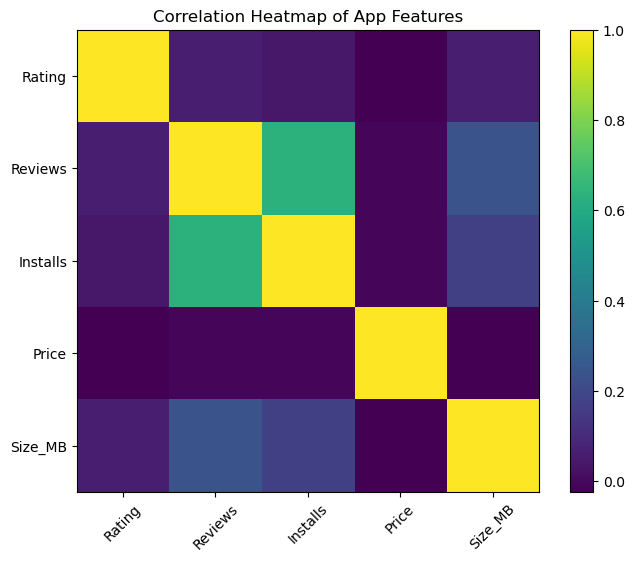

In [35]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap of App Features")
plt.show()


### 🔍 Observation – Correlation Heatmap

- Reviews and Installs show a strong positive correlation, indicating that popular apps tend to receive more user feedback.
- Rating has a weak correlation with Installs, suggesting that higher installs do not always guarantee higher ratings.
- Price shows a slight negative correlation with Installs, meaning paid apps generally have fewer installs.
- App size (Size_MB) has minimal impact on install count.


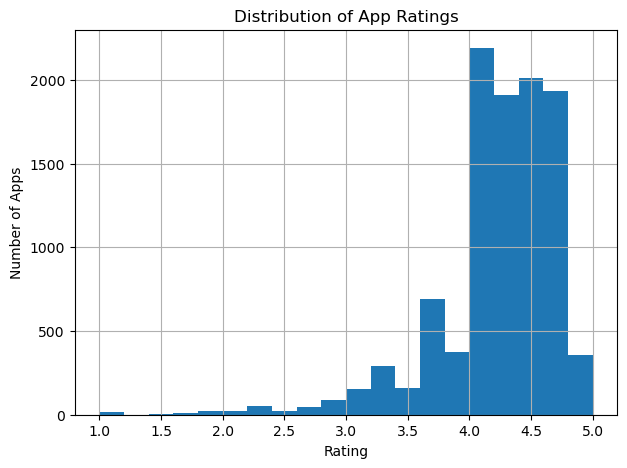

In [36]:
plt.figure(figsize=(7,5))
apps_df['Rating'].dropna().hist(bins=20)
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.title("Distribution of App Ratings")
plt.show()


### 🔍 Observation – Rating Distribution

- Most apps have ratings between 4.0 and 4.5.
- Very few apps have extremely low ratings.
- This suggests that the majority of apps on the Play Store maintain acceptable quality levels.


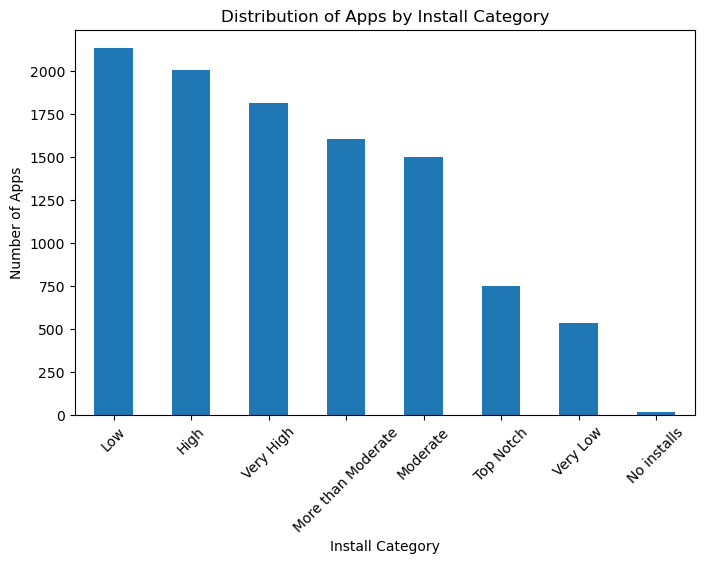

In [37]:
apps_df['Installs_category'].value_counts().plot(kind='bar', figsize=(8,5))
plt.xlabel("Install Category")
plt.ylabel("Number of Apps")
plt.title("Distribution of Apps by Install Category")
plt.xticks(rotation=45)
plt.show()


### 🔍 Observation – Install Categories

- Most apps fall under Low to Moderate install categories.
- Only a small percentage of apps reach the Top Notch install level.
- This indicates high competition, where only few apps achieve massive popularity.


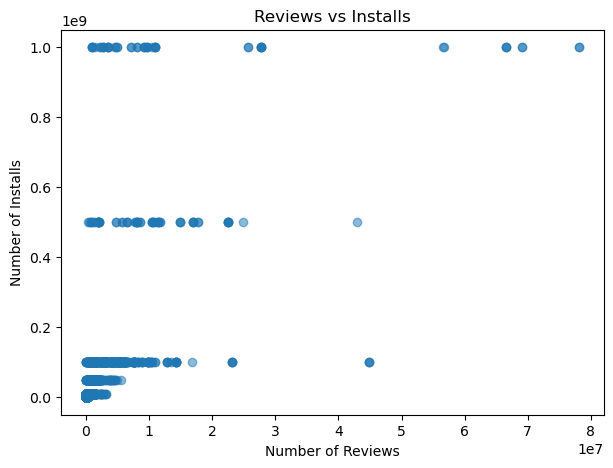

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(apps_df['Reviews'], apps_df['Installs'], alpha=0.5)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Installs")
plt.title("Reviews vs Installs")
plt.show()


### 🔍 Observation – Reviews vs Installs

- Apps with higher number of reviews generally have higher install counts.
- This confirms strong user engagement for popular apps.
- Reviews act as a trust factor influencing new users to install apps.


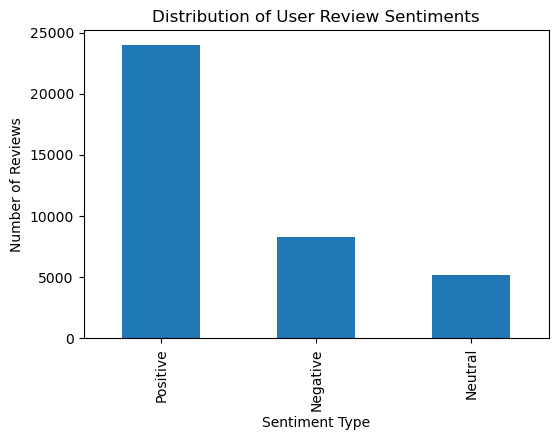

In [39]:
reviews_df['Sentiment'].value_counts().plot(
    kind='bar',
    figsize=(6,4)
)
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.title("Distribution of User Review Sentiments")
plt.show()


### 🔍 Observation – Sentiment Analysis

- Positive reviews dominate the dataset.
- Negative reviews are significantly fewer compared to positive feedback.
- This indicates overall user satisfaction with most apps.


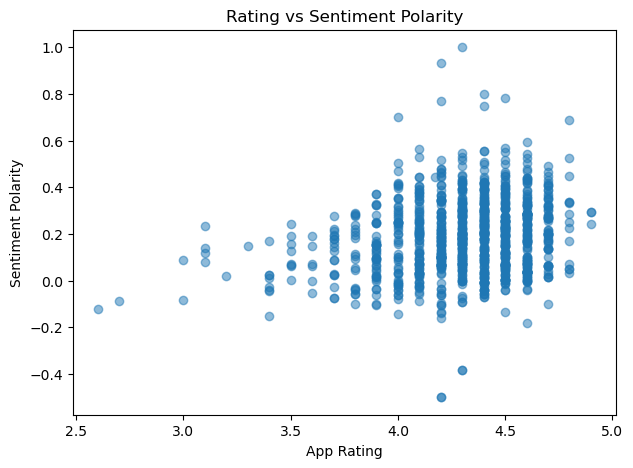

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(
    merged_df['Rating'],
    merged_df['Sentiment_Polarity'],
    alpha=0.5
)
plt.xlabel("App Rating")
plt.ylabel("Sentiment Polarity")
plt.title("Rating vs Sentiment Polarity")
plt.show()


### 🔍 Observation – Rating vs Sentiment Polarity

- Apps with higher sentiment polarity generally tend to have higher ratings.
- This shows a positive relationship between user emotions and app ratings.
- However, the correlation is moderate, indicating other factors also affect ratings.
